In [9]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [95]:
# uplink case
f = open('uplink_data/uplink.pickle', 'rb')
loaded_data = pickle.load(f)

In [76]:
# downlink case
f = open('downlink_data/downlink.pickle', 'rb')
loaded_data = pickle.load(f)

In [96]:
file_size_list = [10, 100, 1000, 10000]
interval_list = [5, 10, 50, 100, 200, 300, 500, 1000, 2000, 5000, 10000, 11000, 20000]

file_len = len(file_size_list)
interval_len = len(interval_list)


plot_data = np.zeros([file_len, interval_len, 7])

for i, file_size in enumerate(file_size_list):
    for j, interval in enumerate(interval_list):
        key_string = str(file_size) + '_' + str(interval)
        try:
            element = loaded_data[key_string]

            first_tx_time = element['first tx time']
            first_init_time = element['first init time']
            first_throughput = file_size*8*1024/(first_tx_time/1e3)

            mean_tx_time = element['mean upload time']
            mean_init_time = element['mean initial latency']
            mean_throughput = element['mean throughput']
            std_throughput = element['std throughput']
            
            plot_data[i,j,0] = first_tx_time
            plot_data[i,j,1] = first_init_time
            plot_data[i,j,2] = first_throughput 
            plot_data[i,j,3] = mean_tx_time
            plot_data[i,j,4] = mean_init_time
            plot_data[i,j,5] = mean_throughput
            plot_data[i,j,6] = std_throughput
            
        except:
            print('No measurement results '+str(file_size)+' '+str(interval))
            plot_data[i,j,0] = first_tx_time
            plot_data[i,j,1] = first_init_time
            plot_data[i,j,2] = first_throughput 
            plot_data[i,j,3] = mean_tx_time
            plot_data[i,j,4] = mean_init_time
            plot_data[i,j,5] = mean_throughput
            plot_data[i,j,6] = std_throughput

No measurement results 10000 20000


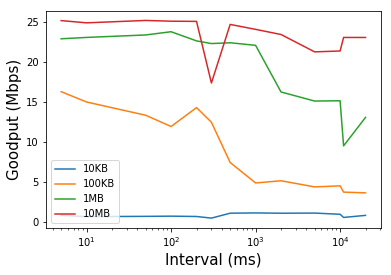

In [97]:
## Goodput vs. Traffic pattern

for i in range(4):
    plt.plot(interval_list,plot_data[i,:,5])
plt.xscale("log")
plt.ylabel("Goodput (Mbps)", size = 15)
plt.xlabel("Interval (ms)", size = 15)
plt.legend(['10KB', '100KB', '1MB', '10MB'])

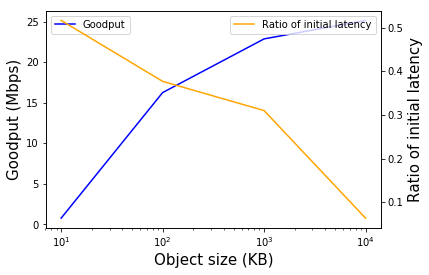

In [100]:
## Goodput and initial latency ratio vs.Object size

fig1, ax1 = plt.subplots()
plt.xscale("log")
plt.xlabel("Object size (KB)", size = 15)

ax1.plot(file_size_list,plot_data[:,0,5], c = 'blue')
ax1.set_ylabel('Goodput (Mbps)', size = 15)
ax1.legend(['Goodput'])

ax2 = ax1.twinx()
ax2.plot(file_size_list,plot_data[:,0,1]/plot_data[:,0,0], c = 'orange')
ax2.set_ylabel('Ratio of initial latency', size = 15)
ax2.legend(['Ratio of initial latency'])

Text(0.5,0,'Interval (ms)')

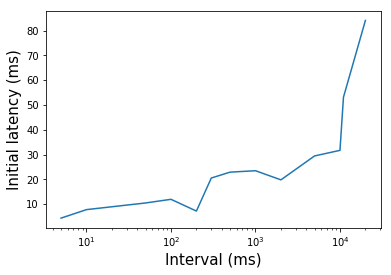

In [99]:
## Initial latency vs. interval

plt.plot(interval_list,plot_data[1,:,4])
plt.xscale("log")
plt.ylabel("Initial latency (ms)", size = 15)
plt.xlabel("Interval (ms)", size = 15)